# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

print 'numpy = %s' % np.__version__
print 'pandas = %s' % pd.__version__
print 'seaborn = %s' % sns.__version__
print 'matplotlib = %s' % mpl.__version__

sns.set_style('whitegrid')
%matplotlib inline

numpy = 1.10.2
pandas = 0.22.0
seaborn = 0.8.0
matplotlib = 2.1.1


In [2]:
def txt_to_df(filename,header=0):
    
    return pd.read_csv(filename,sep='\t',header=header,index_col=0)

def log10(value,pseudocount=1e-6):
    
    return np.log10(value+pseudocount)

def shortTaxonomy(series):
    '''
    given taxonomic classification of an OTU (in pandas.Series),
    create a shortname and indicate font style for each component
    '''
    
    series = series.fillna('')
    
    for level in ['species','genus','family','order','class','phylum']:
        
        if series[level] != '':
            
            topLevel = series[level]
                        
            if level == 'species':
                return ['%s %s' % (series['genus'],series['species']), (1,1)]
            elif level == 'genus':
                return ['%s sp.' % series[level], (1,0)]
            else: 
                return ['%s sp.' % series[level], (0,0)]     
       

# Import top OTU summary statistics

In [3]:
summary_df = txt_to_df('../generate_tables/supp_2_20180218.txt')

summary_df.tail()

,rank,coef,abs_coef,mean,mean_0,mean_1,mlr,prev,prev_0,prev_1,...,i_coef_h,i_pvalue,kingdom,phylum,class,order,family,genus,species,otu_id
Feature,,,,,,,,,,,,,,,,,,,,,
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__;s__;otu__4301141,96,0.030889,0.030889,0.000053,0.000036,0.000094,0.406918,0.223684,0.148148,0.409091,...,1.035810,0.040307,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,NaN,4301141
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella;s__;otu__76393,97,-0.035368,0.035368,0.001457,0.001887,0.000401,-0.671478,0.381579,0.462963,0.181818,...,0.023232,0.062432,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN,76393
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__;s__;otu__199054,98,-0.027457,0.027457,0.000197,0.000223,0.000134,-0.221842,0.802632,0.814815,0.772727,...,0.187585,0.245459,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NaN,NaN,199054
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospira;s__;otu__194727,99,-0.026162,0.026162,0.000006,0.000007,0.000003,-0.236301,0.105263,0.111111,0.090909,...,0.366389,0.707087,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnospira,NaN,194727
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;otu__4302049,100,0.024949,0.024949,0.000014,0.000009,0.000027,0.452385,0.131579,0.092593,0.227273,...,0.898678,0.141889,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,NaN,4302049


# Subset OTUs to highlight & define their figure parameters
* OTUs in the Bacteroides phylum
* OTUs in the Streptococcus genus
* OTUs either in the Blautia or Ruminococcus genera

** Create and format labels for each OTU **

In [4]:
df = pd.DataFrame(index= summary_df.otu_id.values,
                  columns=['label_text','label_style'])

     
taxonomy_keys = ['kingdom','phylum','class','order','family','genus','species','otu_id']

for index, row in summary_df.iterrows():
    
    otu_id = row['otu_id']
    short_id = shortTaxonomy(row[taxonomy_keys]);
    df.loc[otu_id,'label_text'] = short_id[0]
    df.loc[otu_id,'label_style'] = short_id[1]
    
plot_df = df;

** Identify and flag OTUs that will be highlighted in figure**

In [5]:
# pd.DataFrame(index= summary_df.otu_id.values,
#              columns=['label_location','label_y_coord',
#                       'abund_0','abund_1'])
df = pd.DataFrame(index= summary_df.otu_id.values,
                  columns=['otu_group'])

array_1 = summary_df[summary_df['phylum']=='Bacteroidetes'].otu_id.values
array_2 = summary_df[summary_df['genus']=='Streptococcus'].otu_id.values
array_3 = summary_df[summary_df['genus'].isin({'Blautia','Ruminococcus'})].otu_id.values

df.loc[array_1,'otu_group'] = ['Bacteroidetes']*len(array_1)
df.loc[array_2,'otu_group'] = ['Streptococcus']*len(array_2)
df.loc[array_3,'otu_group'] = ['Blautia']*len(array_3)

df = df.fillna('other')

plot_df = plot_df.join(df)

** Define colors and z-axis order for slopes **

In [6]:
df = pd.DataFrame(index= summary_df.otu_id.values,
                  columns=['color','zorder'])

color_dict = {'Bacteroidetes' : '#2e8b57',
              'Streptococcus' : '#b03060',
              'Blautia' : '#4169e1'}

zorder_dict = {'Bacteroidetes' : 2,
               'Streptococcus' : 2,
               'Blautia' : 4}

lwidth_dict = {'Bacteroidetes' : 3,
               'Streptococcus' : 3,
               'Blautia' : 3}

# default colors
df.loc[:,'color'] = [(0.6,0.6,0.6,0.5)] * plot_df.shape[0]
df.loc[:,'zorder'] = [1] * plot_df.shape[0]
df.loc[:,'lwidth'] = [1] * plot_df.shape[0]

for group in color_dict.keys():
    
    array = plot_df[plot_df['otu_group']==group].index;
    df.loc[array,'color'] = [color_dict[group]] * len(array)
    df.loc[array,'zorder'] = [zorder_dict[group]] * len(array)
    df.loc[array,'lwidth'] = [lwidth_dict[group]] * len(array)

plot_df = plot_df.join(df)

** Define slope parameters and label side **

In [7]:
df = pd.DataFrame(index= summary_df.otu_id.values,
                  columns=['label_side','label_y_coord',
                           'mean_0','mean_1']);

array_0 = summary_df[summary_df.coef<0]
array_1 = summary_df[summary_df.coef>0]

array_0_ids = array_0.otu_id.values
array_1_ids = array_1.otu_id.values

df.loc[array_0_ids,'label_side'] = ['left']*len(array_0_ids)
df.loc[array_1_ids,'label_side'] = ['right']*len(array_1_ids)

df.loc[array_0_ids,'label_y_coord'] = log10(summary_df.loc[array_0.index,'mean_0'].values)
df.loc[array_1_ids,'label_y_coord'] = log10(summary_df.loc[array_1.index,'mean_1'].values)

for index,row in summary_df.iterrows():
    
    mean_0 = log10(row['mean_0'])
    mean_1 = log10(row['mean_1'])
    
    df.loc[row['otu_id'],['mean_0','mean_1']] = [mean_0,mean_1]

plot_df = plot_df.join(df)

In [8]:
plot_df.head()

,label_text,label_style,otu_group,color,zorder,lwidth,label_side,label_y_coord,mean_0,mean_1
282360,Corynebacterium sp.,"(1, 0)",other,"(0.6, 0.6, 0.6, 0.5)",1,1,left,-3.86344,-3.86344,-4.92544
738351,Ruminococcaceae sp.,"(0, 0)",other,"(0.6, 0.6, 0.6, 0.5)",1,1,left,-4.88079,-4.88079,-5.64395
174638,Dialister sp.,"(1, 0)",other,"(0.6, 0.6, 0.6, 0.5)",1,1,left,-3.42096,-3.42096,-3.56443
69664,Clostridium sp.,"(1, 0)",other,"(0.6, 0.6, 0.6, 0.5)",1,1,left,-3.15361,-3.15361,-3.61096
97301,Clostridium sp.,"(1, 0)",other,"(0.6, 0.6, 0.6, 0.5)",1,1,right,-4.53139,-4.9109,-4.53139


# Plot figure

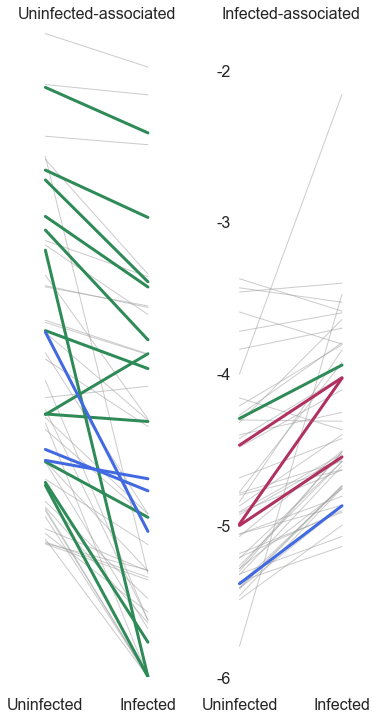

In [9]:
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

fig = plt.figure(figsize=[5.5,12])

gs = GridSpec(1,2,width_ratios=[2,2],wspace=0.72)

axes = {'left': plt.subplot(gs[0,0]),
        'right': plt.subplot(gs[0,1])}

for index,row in plot_df.iterrows():
    
    ax = axes[row['label_side']];

    if row['otu_group'] != 'other':
        ax.plot([0,1],row[['mean_0','mean_1']],
                lw=1,
                color=(0.6,0.6,0.6,0.5),
                zorder=1)
    
    ax.plot([0,1],row[['mean_0','mean_1']],
            lw=row['lwidth'],
            color=row['color'],
            zorder=row['zorder'],)
    
sns.set_style("ticks")

for ax in axes.values():
    ax.set_ylim([-6,-1.7])
    
    plt.setp(ax,yticks=[-6,-5,-4,-3,-2],yticklabels=['-6','-5','-4','-3','-2']) 
    plt.setp(ax,xticks=[0,1],xticklabels=['\nUninfected','\nInfected'])
    
    [ax.spines[loc].set_visible(False) for loc in ['top','bottom','left','right']] 
    [ii.set(fontsize=16) for ii in ax.get_xticklabels()+ax.get_yticklabels()]
    
    ax.grid(False)
    
axes['left'].set_title('Uninfected-associated',fontsize=16)
axes['right'].set_title('Infected-associated',fontsize=16)

    
plt.setp(axes['left'],yticks=[-6,-5,-4,-3,-2],yticklabels=[]) 
plt.setp(axes['right'],yticks=[-6,-5,-4,-3,-2],yticklabels=['-6','-5','-4','-3','-2']) 

axes['left'].yaxis.set_label_coords(-0.1, 0.114)     
axes['right'].yaxis.set_label_coords(1.1, 0.114)     

plt.savefig('./figs/midani_figure_3_backend.pdf',filetype='pdf')

In [10]:
highlight_right = plot_df.isin({'label_side':['right'],'otu_group':['Bacteroidetes','Streptococcus','Blautia']})
highlight_right = plot_df[highlight_right.sum(1)==2]

highlight_left = plot_df.isin({'label_side':['left'],'otu_group':['Bacteroidetes','Streptococcus','Blautia']})
highlight_left = plot_df[highlight_left.sum(1)==2]

In [11]:
highlight_right.sort_values(['label_y_coord'],ascending=False)

,label_text,label_style,otu_group,color,zorder,lwidth,label_side,label_y_coord,mean_0,mean_1
329693,Prevotella copri,"(1, 1)",Bacteroidetes,#2e8b57,2,3,right,-3.94435,-4.29652,-3.94435
3384047,Streptococcus sp.,"(1, 0)",Streptococcus,#b03060,2,3,right,-4.02798,-4.47273,-4.02798
3678349,Streptococcus sp.,"(1, 0)",Streptococcus,#b03060,2,3,right,-4.03107,-4.99219,-4.03107
4302049,Streptococcus sp.,"(1, 0)",Streptococcus,#b03060,2,3,right,-4.54979,-5.00218,-4.54979
190991,Blautia sp.,"(1, 0)",Blautia,#4169e1,4,3,right,-4.87174,-5.38587,-4.87174


In [12]:
highlight_left.sort_values(['label_y_coord'],ascending=False)

,label_text,label_style,otu_group,color,zorder,lwidth,label_side,label_y_coord,mean_0,mean_1
180825,Prevotella copri,"(1, 1)",Bacteroidetes,#2e8b57,2,3,left,-2.11401,-2.11401,-2.41397
300859,Prevotella sp.,"(1, 0)",Bacteroidetes,#2e8b57,2,3,left,-2.6592,-2.6592,-2.97137
76393,Prevotella sp.,"(1, 0)",Bacteroidetes,#2e8b57,2,3,left,-2.72411,-2.72411,-3.39559
292921,Prevotella copri,"(1, 1)",Bacteroidetes,#2e8b57,2,3,left,-2.96437,-2.96437,-3.42997
4310223,Bacteroidales sp.,"(0, 0)",Bacteroidetes,#2e8b57,2,3,left,-3.05458,-3.05458,-3.77818
227285,Prevotella sp.,"(1, 0)",Bacteroidetes,#2e8b57,2,3,left,-3.18722,-3.18722,-6
4307092,Prevotella stercorea,"(1, 1)",Bacteroidetes,#2e8b57,2,3,left,-3.71727,-3.71727,-3.96775
4375860,Ruminococcus sp.,"(1, 0)",Blautia,#4169e1,4,3,left,-3.72708,-3.72708,-5.04128
292041,Prevotella copri,"(1, 1)",Bacteroidetes,#2e8b57,2,3,left,-4.26689,-4.26689,-4.31644
4256470,Bacteroides ovatus,"(1, 1)",Bacteroidetes,#2e8b57,2,3,left,-4.2704,-4.2704,-3.86965


**Downstream annotations of the figure were undertaken in Adobe Illustrator** 